In [1]:
import pandas as pd
import numpy as np
import pylab as pl
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = shuffle(pd.read_csv("music.csv"))

In [3]:
data.shape

(1000, 28)

In [4]:
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
876,reggae.00076.wav,0.440458,3.934441,2455.989277,2559.722919,5054.369437,0.088272,-105.677889,76.102924,19.509347,...,-2.192463,-1.506213,2.640891,2.120583,1.428914,3.844995,5.693852,-0.138507,-1.555092,reggae
188,classical.00088.wav,0.294135,-11.098101,1302.662455,1455.251726,2347.185807,0.070536,-299.775531,157.336859,-37.354209,...,-7.837650,-2.732071,-1.108236,1.650344,3.642179,3.084369,0.109205,-0.795172,-2.738005,classical
690,metal.00090.wav,0.426885,3.292297,2141.608766,2217.275314,4682.588352,0.084678,-93.466329,100.659428,-23.376745,...,23.037571,-9.966016,4.163811,-12.804138,1.793726,-2.022721,1.938351,-9.064212,-7.048717,metal
322,disco.00022.wav,0.436498,1.153798,3707.398851,3249.407534,7806.994459,0.172900,-71.921913,46.885171,21.032876,...,-1.561577,-3.622247,-3.817346,-5.291046,-2.922674,-2.899888,-1.799633,-0.712630,-0.983584,disco
498,hiphop.00098.wav,0.533298,2.428911,2538.368061,2341.604484,5353.609294,0.100670,-129.918275,71.996670,-23.235324,...,14.666472,-2.934063,9.043224,-4.725942,5.380304,-2.408319,1.620739,-5.978244,-0.826952,hiphop


In [5]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['label']= label_encoder.fit_transform(data['label']) 
data['filename']=label_encoder.fit_transform(data['filename'])  
data['label'].unique() 
#bankdata['filename'].unique() 

array([8, 1, 6, 3, 4, 5, 7, 0, 9, 2])

In [6]:
X = data.drop('label', axis=1)
X= data.drop('filename',axis=1)
y = data['label']

In [7]:
X.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
876,0.440458,3.934441,2455.989277,2559.722919,5054.369437,0.088272,-105.677889,76.102924,19.509347,36.708055,...,-2.192463,-1.506213,2.640891,2.120583,1.428914,3.844995,5.693852,-0.138507,-1.555092,8
188,0.294135,-11.098101,1302.662455,1455.251726,2347.185807,0.070536,-299.775531,157.336859,-37.354209,15.771008,...,-7.837650,-2.732071,-1.108236,1.650344,3.642179,3.084369,0.109205,-0.795172,-2.738005,1
690,0.426885,3.292297,2141.608766,2217.275314,4682.588352,0.084678,-93.466329,100.659428,-23.376745,52.507715,...,23.037571,-9.966016,4.163811,-12.804138,1.793726,-2.022721,1.938351,-9.064212,-7.048717,6
322,0.436498,1.153798,3707.398851,3249.407534,7806.994459,0.172900,-71.921913,46.885171,21.032876,29.954266,...,-1.561577,-3.622247,-3.817346,-5.291046,-2.922674,-2.899888,-1.799633,-0.712630,-0.983584,3
498,0.533298,2.428911,2538.368061,2341.604484,5353.609294,0.100670,-129.918275,71.996670,-23.235324,63.223485,...,14.666472,-2.934063,9.043224,-4.725942,5.380304,-2.408319,1.620739,-5.978244,-0.826952,4


In [8]:
y.head()

876    8
188    1
690    6
322    3
498    4
Name: label, dtype: int64

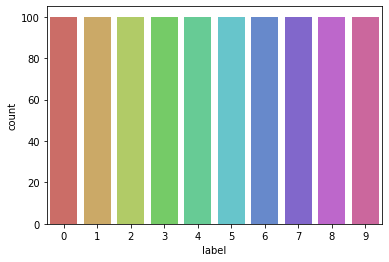

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.countplot(x='label' , data= data, palette = 'hls')
plt.show()

In [10]:
#dividing 90% of dataset into training and 10% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)

In [11]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [12]:
y_pred = svclassifier.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 6  1  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0]
 [ 0  1 16  1  0  0  0  0  0  0]
 [ 0  0  2 10  1  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  2  9  0  0  0  0]
 [ 0  0  0  0  2  0  4  1  0  0]
 [ 0  0  0  0  0  0  0  9  0  0]
 [ 0  0  0  0  0  0  0  3  5  2]
 [ 0  0  0  0  0  0  0  1  1  7]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.83      1.00      0.91        10
           2       0.89      0.89      0.89        18
           3       0.91      0.77      0.83        13
           4       0.55      1.00      0.71         6
           5       1.00      0.82      0.90        11
           6       1.00      0.57      0.73         7
           7       0.64      1.00      0.78         9
           8       0.83      0.50      0.62        10
           9       0.78      0.78      0.78         9

    accuracy                           0.82       100
   macro avg       

(10.0, 0.0)

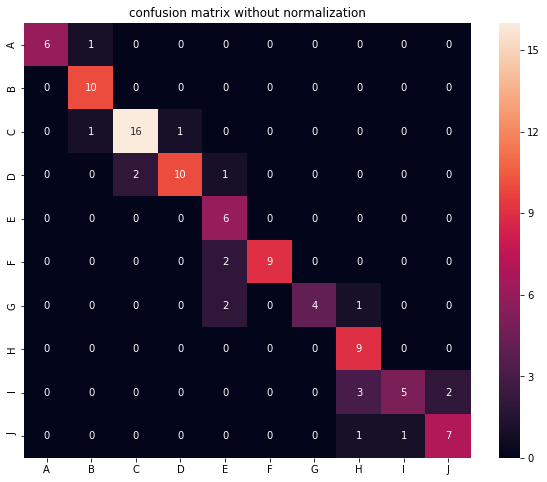

In [14]:
import numpy as np
from numpy import linalg as LA 
import seaborn as sn
confmat=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confmat , index = [i for i in "ABCDEFGHIJ"] , columns = [i for i in "ABCDEFGHIJ"])
plt.figure(figsize = (10,8))
plt.title('confusion matrix without normalization')
ax = sn.heatmap(df_cm, annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [15]:
#dividing 80% of dataset into training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [16]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [17]:
y_pred = svclassifier.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  0  0  0  0  0  0  0  0  0]
 [ 1 14  2  0  0  0  0  0  0  0]
 [ 0  1 20  1  0  0  0  0  0  0]
 [ 0  0  3 16  0  0  0  0  0  0]
 [ 0  0  0  1 16  3  0  0  0  0]
 [ 0  2  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  1  0 14  0  0  0]
 [ 0  0  0  0  0  1  0 22  0  0]
 [ 0  0  0  0  0  0  1  6 15  2]
 [ 0  0  0  0  0  0  0  0  0 21]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.82      0.82      0.82        17
           2       0.80      0.91      0.85        22
           3       0.89      0.84      0.86        19
           4       0.89      0.80      0.84        20
           5       0.81      0.85      0.83        20
           6       0.93      0.93      0.93        15
           7       0.79      0.96      0.86        23
           8       1.00      0.62      0.77        24
           9       0.91      1.00      0.95        21

    accuracy                           0.87       200
   macro avg       

(10.0, 0.0)

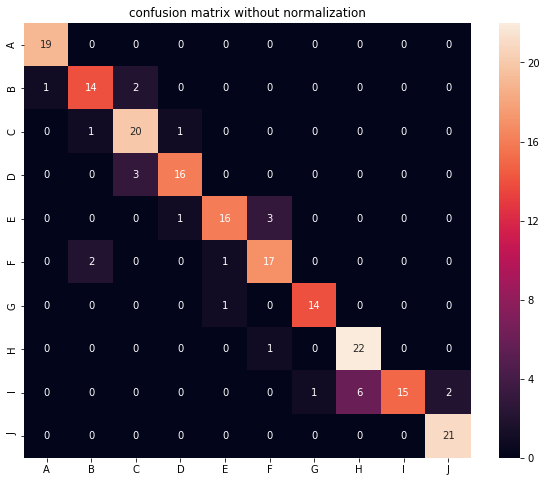

In [19]:
import numpy as np
from numpy import linalg as LA 
import seaborn as sn
confmat=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confmat , index = [i for i in "ABCDEFGHIJ"] , columns = [i for i in "ABCDEFGHIJ"])
plt.figure(figsize = (10,8))
plt.title('confusion matrix without normalization')
ax = sn.heatmap(df_cm, annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [20]:
#dividing 70% of dataset into training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [21]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [22]:
y_pred = svclassifier.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[30  0  0  0  0  0  0  0  0  0]
 [ 0 27  3  0  0  0  0  0  0  0]
 [ 1  2 31  3  0  0  0  0  0  0]
 [ 0  1  1 18  1  0  0  0  0  0]
 [ 0  0  0  5 24  4  0  0  0  0]
 [ 0  0  0  0  0 24  0  1  0  0]
 [ 0  0  0  0  2  1 26  1  0  0]
 [ 0  0  0  0  0  0  0 21  4  0]
 [ 0  0  0  0  0  0  0  4 29  1]
 [ 0  0  0  0  0  0  0  2  6 27]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       0.90      0.90      0.90        30
           2       0.89      0.84      0.86        37
           3       0.69      0.86      0.77        21
           4       0.89      0.73      0.80        33
           5       0.83      0.96      0.89        25
           6       1.00      0.87      0.93        30
           7       0.72      0.84      0.78        25
           8       0.74      0.85      0.79        34
           9       0.96      0.77      0.86        35

    accuracy                           0.86       300
   macro avg       

(10.0, 0.0)

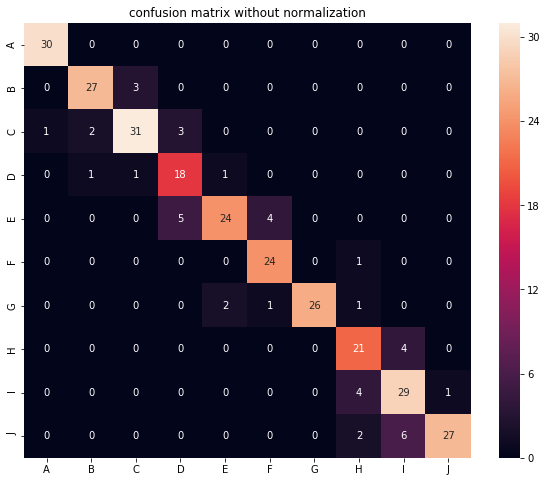

In [24]:
import numpy as np
from numpy import linalg as LA 
import seaborn as sn
confmat=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confmat , index = [i for i in "ABCDEFGHIJ"] , columns = [i for i in "ABCDEFGHIJ"])
plt.figure(figsize = (10,8))
plt.title('confusion matrix without normalization')
ax = sn.heatmap(df_cm, annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [25]:
#dividing 60% of dataset into training and 40% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)

In [26]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
y_pred = svclassifier.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 39  1  0  0  0  0  0  0  0]
 [ 4  0 36  3  0  0  0  0  0  0]
 [ 0  0  3 30  5  0  2  0  0  0]
 [ 0  0  0  4 34  2  2  0  0  0]
 [ 0  0  0  0  6 29  0  0  0  0]
 [ 0  0  0  0  7  1 38  0  0  0]
 [ 0  0  0  0  0  2  0 31  5  0]
 [ 0  0  0  0  0  0  3  3 26 12]
 [ 0  0  0  0  0  1  0  2  3 33]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       1.00      0.97      0.99        40
           2       0.90      0.84      0.87        43
           3       0.81      0.75      0.78        40
           4       0.65      0.81      0.72        42
           5       0.83      0.83      0.83        35
           6       0.84      0.83      0.84        46
           7       0.86      0.82      0.84        38
           8       0.76      0.59      0.67        44
           9       0.73      0.85      0.79        39

    accuracy                           0.82       400
   macro avg       

(10.0, 0.0)

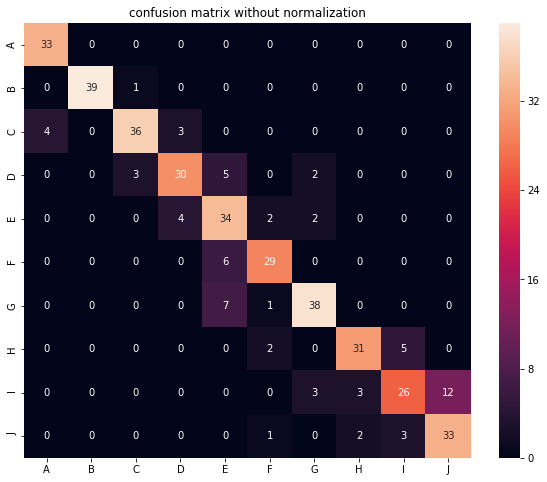

In [29]:
import numpy as np
from numpy import linalg as LA 
import seaborn as sn
confmat=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confmat , index = [i for i in "ABCDEFGHIJ"] , columns = [i for i in "ABCDEFGHIJ"])
plt.figure(figsize = (10,8))
plt.title('confusion matrix without normalization')
ax = sn.heatmap(df_cm, annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [30]:
#dividing 50% of dataset into training and 50% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)

In [31]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [32]:
y_pred = svclassifier.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[46  0  0  0  0  0  0  0  0  0]
 [ 0 38  6  0  0  0  0  0  0  0]
 [ 5  1 39  3  0  0  0  0  0  0]
 [ 0  1 11 34  4  4  0  0  0  0]
 [ 0  1  3 12 35  8  0  0  0  0]
 [ 0  9  1  1  2 44  0  0  0  0]
 [ 0  0  0  0  3  0 42  0  2  1]
 [ 0  1  0  0  0  4  0 43  4  0]
 [ 0  0  0  0  0  2  0  4 25  4]
 [ 0  0  0  0  1  0  6  8  8 34]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        46
           1       0.75      0.86      0.80        44
           2       0.65      0.81      0.72        48
           3       0.68      0.63      0.65        54
           4       0.78      0.59      0.67        59
           5       0.71      0.77      0.74        57
           6       0.88      0.88      0.88        48
           7       0.78      0.83      0.80        52
           8       0.64      0.71      0.68        35
           9       0.87      0.60      0.71        57

    accuracy                           0.76       500
   macro avg       

(10.0, 0.0)

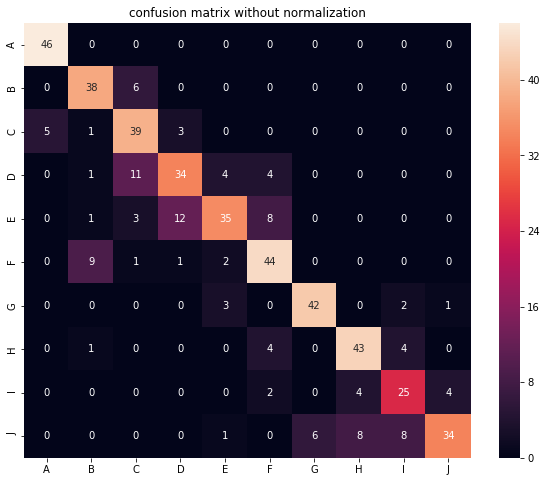

In [34]:
import numpy as np
from numpy import linalg as LA 
import seaborn as sn
confmat=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confmat , index = [i for i in "ABCDEFGHIJ"] , columns = [i for i in "ABCDEFGHIJ"])
plt.figure(figsize = (10,8))
plt.title('confusion matrix without normalization')
ax = sn.heatmap(df_cm, annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [35]:
#dividing 40% of dataset into training and 60% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.60)

In [36]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
y_pred = svclassifier.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[47  0  6 12  0  0  7  0  0  0]
 [ 0 62  4  1  0  0  0  0  0  0]
 [ 8  2 37  7  1  1  0  0  0  0]
 [ 3  1 19 32  9  0  0  0  0  0]
 [ 3  0  4  7 39  2  1  0  0  0]
 [ 4  3  0  1  9 41  0  0  0  0]
 [ 0  0  0  5  6  0 46  0  0  2]
 [ 0  0  0  0  1  2  0 49  2  2]
 [ 0  0  0  0  1  4  3  8 27 12]
 [ 0  0  0  0  0  0  1  4 15 37]]
              precision    recall  f1-score   support

           0       0.72      0.65      0.69        72
           1       0.91      0.93      0.92        67
           2       0.53      0.66      0.59        56
           3       0.49      0.50      0.50        64
           4       0.59      0.70      0.64        56
           5       0.82      0.71      0.76        58
           6       0.79      0.78      0.79        59
           7       0.80      0.88      0.84        56
           8       0.61      0.49      0.55        55
           9       0.70      0.65      0.67        57

    accuracy                           0.69       600
   macro avg       

(10.0, 0.0)

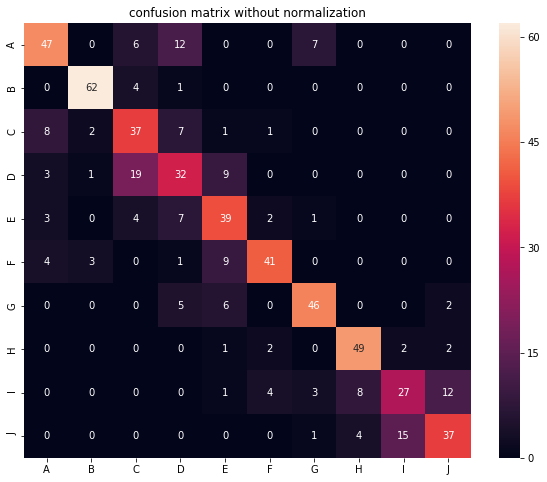

In [39]:
import numpy as np
from numpy import linalg as LA 
import seaborn as sn
confmat=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confmat , index = [i for i in "ABCDEFGHIJ"] , columns = [i for i in "ABCDEFGHIJ"])
plt.figure(figsize = (10,8))
plt.title('confusion matrix without normalization')
ax = sn.heatmap(df_cm, annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [40]:
#dividing 30% of dataset into training and 70% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.70)

In [41]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [42]:
y_pred = svclassifier.predict(X_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[51  0 12  4  0  0  3  0  0  0]
 [ 0 66  5  4  0  0  0  0  0  0]
 [ 5  3 53  5  0  0  0  0  0  0]
 [ 2  0 16 45  3  0  3  1  0  0]
 [ 2  0  0 10 41  5  3  2  0  0]
 [ 2  8  1  2  4 50  0  0  0  0]
 [ 3  0  0  0 11  0 50  0  0  6]
 [ 0  0  0  0  5  3  0 53  1  6]
 [ 0  1  0  0  2 12  3 10 33 20]
 [ 0  0  0  0  0  7  1  5  5 52]]
              precision    recall  f1-score   support

           0       0.78      0.73      0.76        70
           1       0.85      0.88      0.86        75
           2       0.61      0.80      0.69        66
           3       0.64      0.64      0.64        70
           4       0.62      0.65      0.64        63
           5       0.65      0.75      0.69        67
           6       0.79      0.71      0.75        70
           7       0.75      0.78      0.76        68
           8       0.85      0.41      0.55        81
           9       0.62      0.74      0.68        70

    accuracy                           0.71       700
   macro avg       

(10.0, 0.0)

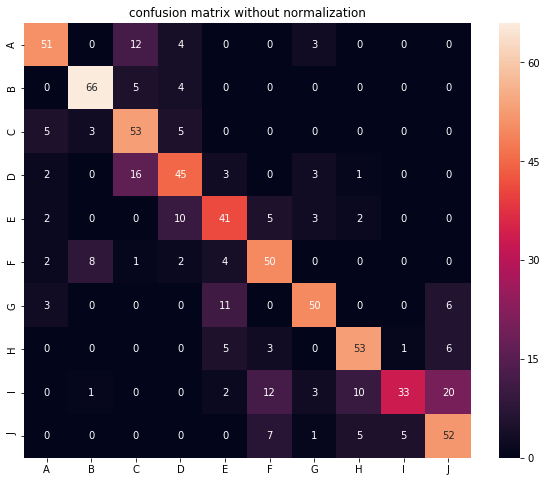

In [44]:
import numpy as np
from numpy import linalg as LA 
import seaborn as sn
confmat=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confmat , index = [i for i in "ABCDEFGHIJ"] , columns = [i for i in "ABCDEFGHIJ"])
plt.figure(figsize = (10,8))
plt.title('confusion matrix without normalization')
ax = sn.heatmap(df_cm, annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [45]:
#dividing 20% of dataset into training and 80% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80)

In [46]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [47]:
y_pred = svclassifier.predict(X_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[49  0 13  0  2  3  7  0  0  0]
 [ 0 72  2  0  0  1  0  0  0  0]
 [ 8  3 50  6  5  3  0  2  0  0]
 [ 9  2 13 35 12  0  8  7  0  0]
 [ 4  2 17 11 26  2 12  3  0  0]
 [ 6  6 19  5  4 31  2  3  5  1]
 [ 1  0  0  1 11  0 64  0  0  6]
 [ 0  3  0 12  9  0  0 49  9  4]
 [ 1  4  0  2  0  7  5  9 38 11]
 [ 0  1  0  5  0  1  5  6 13 52]]
              precision    recall  f1-score   support

           0       0.63      0.66      0.64        74
           1       0.77      0.96      0.86        75
           2       0.44      0.65      0.52        77
           3       0.45      0.41      0.43        86
           4       0.38      0.34      0.36        77
           5       0.65      0.38      0.48        82
           6       0.62      0.77      0.69        83
           7       0.62      0.57      0.59        86
           8       0.58      0.49      0.54        77
           9       0.70      0.63      0.66        83

    accuracy                           0.58       800
   macro avg       

(10.0, 0.0)

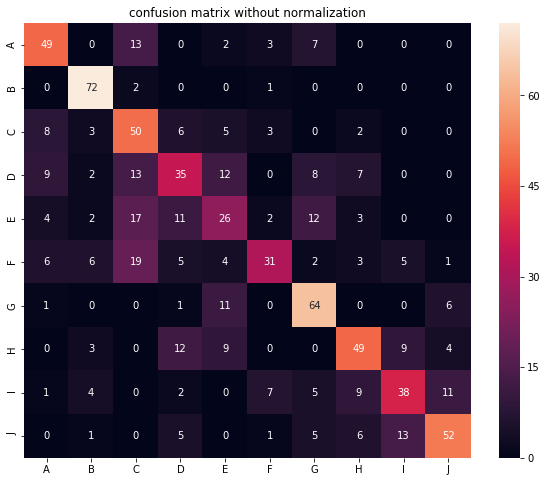

In [49]:
import numpy as np
from numpy import linalg as LA 
import seaborn as sn
confmat=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confmat , index = [i for i in "ABCDEFGHIJ"] , columns = [i for i in "ABCDEFGHIJ"])
plt.figure(figsize = (10,8))
plt.title('confusion matrix without normalization')
ax = sn.heatmap(df_cm, annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

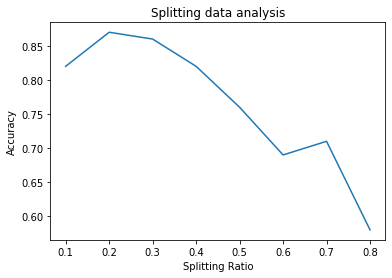

In [51]:
# importing the required module 
import matplotlib.pyplot as plt 
  
# x axis values 
x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8] 
# corresponding y axis values 
y = [0.82,0.87,0.86,0.82,0.76,0.69,0.71,0.58] 
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('Splitting Ratio') 
# naming the y axis 
plt.ylabel('Accuracy') 
  
# giving a title to my graph 
plt.title('Splitting data analysis') 
  
# function to show the plot 
plt.show() 